<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Data

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

## Downloading data

In [5]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "f0ec34f29bf37cceb765b25f5a1bce2c" # key from the json file

! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
! unzip -q "creditcardfraud.zip"

In [0]:
df = pd.read_csv("creditcard.csv")

In [8]:
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Not Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Fraud 0.17 % of the dataset
Not Fraud 99.83 % of the dataset


## Preprocessing

No columns need to be removed

In [0]:
norm = ((df - df.min())/(df.max()-df.min()))

## Cross-validation 

In [10]:
norm.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
features = list(norm.columns[0:30])
print(features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [0]:
x = norm[features]
y = norm['Class']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)  

0.5002247127889666

In [22]:
dt = DecisionTreeClassifier(min_samples_split = 30, max_depth = 4, random_state = 32)
dt.fit(x_train, y_train)
print("DT score: ", dt.score(x_test, y_test))
print("Train score: ", cross_validate(dt, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(dt, x_test, y_test)['test_score'].mean())

DT score:  0.9994241734782731
Train score:  0.9993118138620349
Test score:  0.9992415947308334


In [23]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = 32)
rf.fit(x_train, y_train)
print("DT score: ", rf.score(x_test, y_test))
print("Train score: ", cross_validate(rf, x_train, y_train)['test_score'].mean())
print("Test score: ", cross_validate(rf, x_test, y_test)['test_score'].mean())

DT score:  0.9993820398303418
Train score:  0.9993445846305097
Test score:  0.9993118174774687


Feature ranking:
1. V17 (0.728145)
2. V14 (0.121322)
3. V10 (0.062537)
4. V12 (0.053587)
5. V26 (0.019315)
6. V8 (0.009773)
7. V21 (0.005321)
8. V1 (0.000000)
9. V2 (0.000000)
10. V3 (0.000000)
11. V4 (0.000000)
12. V5 (0.000000)
13. V6 (0.000000)
14. V7 (0.000000)
15. V9 (0.000000)
16. V11 (0.000000)
17. Amount (0.000000)
18. V13 (0.000000)
19. V28 (0.000000)
20. V15 (0.000000)
21. V16 (0.000000)
22. V18 (0.000000)
23. V19 (0.000000)
24. V20 (0.000000)
25. V22 (0.000000)
26. V23 (0.000000)
27. V24 (0.000000)
28. V25 (0.000000)
29. V27 (0.000000)
30. Time (0.000000)


(0.0, 0.7645523165828936)

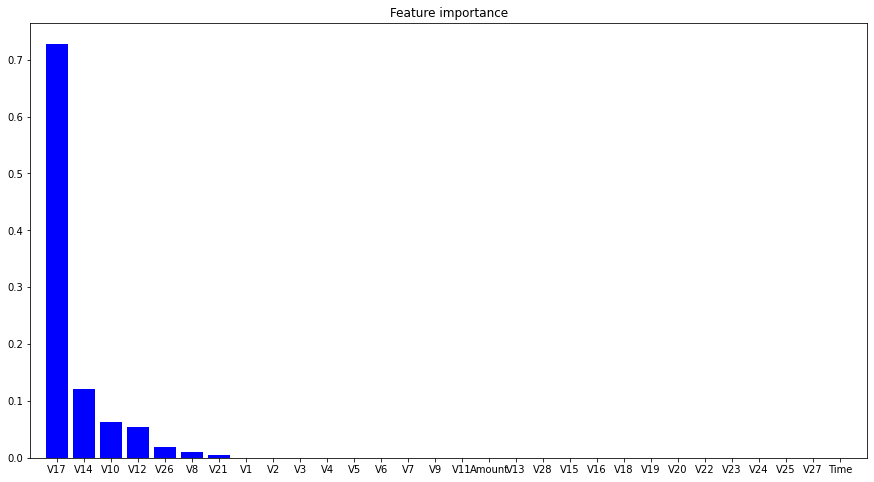

In [25]:
dt.fit(x, y)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])

Feature ranking:
1. V17 (0.226127)
2. V12 (0.165042)
3. V10 (0.122450)
4. V14 (0.116532)
5. V16 (0.080437)
6. V11 (0.077792)
7. V18 (0.030342)
8. V9 (0.028699)
9. V7 (0.028462)
10. V4 (0.026261)
11. V3 (0.011895)
12. V21 (0.011552)
13. V26 (0.009491)
14. V2 (0.008386)
15. V27 (0.008285)
16. V6 (0.008110)
17. V8 (0.005718)
18. V5 (0.005317)
19. V20 (0.004531)
20. V1 (0.004129)
21. V19 (0.003324)
22. V24 (0.003195)
23. V15 (0.003130)
24. V28 (0.002149)
25. V22 (0.001933)
26. Amount (0.001890)
27. Time (0.001780)
28. V23 (0.001203)
29. V25 (0.000957)
30. V13 (0.000883)


(0.0, 0.5645685419451831)

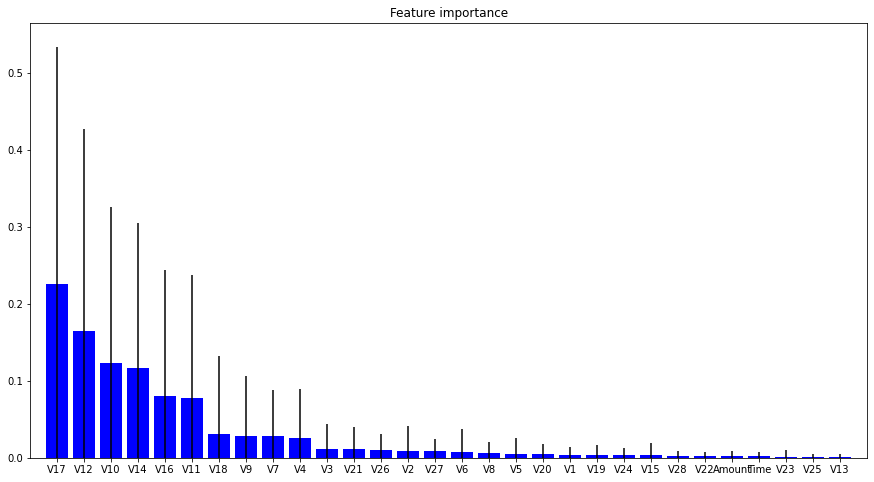

In [24]:
rf.fit(x, y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(x.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importance")
plt.bar(range(x.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])